In [130]:
using Convex, GLPK  # Convex modeling and solver
using Distributions, Random  # Seeds and sampling
using LightGraphs  # Generating nice random graphs
using Plots, GraphPlot, Colors  # For plottig

# Generate some random data

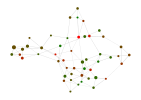

In [125]:
Random.seed!(2)
n = 50

# Make graph
G = watts_strogatz(n, 4, 0.2)

# Convert to incidence matrix
A = incidence_matrix(G, oriented=true)
m = size(A, 2)

# Generate carbon costs
c = rand(Exponential(2), n)

# Generate demands
d = rand(Bernoulli(0.8), n) .* rand(Gamma(3.0, 3.0), n)

# Generate generation and flow capacities
gmax = rand(Gamma(4.0, 3.0), n) + (1/2)*d  # This is just to make the problem easier
pmax = rand(Gamma(3.0, 3.0), m)

# Plot network
nodesize = maximum(d) .+ d
nodefillc = weighted_color_mean.((c/maximum(c)).^0.5, colorant"red", colorant"green")
edgelinewidth = (pmax / maximum(pmax)).^0.5
plt = gplot(G, nodesize=nodesize, nodefillc=nodefillc, edgelinewidth=edgelinewidth)

# Solve the carbon management problem

In [126]:
g = Variable(n)
p = Variable(m)

objective = c'g
constraints = [
    abs(p) <= pmax,
    0 <= g, 
    g <= gmax,
    g - d == A*p
]

problem = minimize(objective, constraints)
solve!(problem, () -> GLPK.Optimizer(), verbose=true)

# Plot results

`GraphPlot` is only for making simple plots. To do more advanced things (like the plot in the carbon accounting paper), we'll need to draw the graph manually.

For now, I'm going to make some simple diagnostic plots.

## Plot demand, generation, and LMPs

Here, the LMPs are carbon LMPs.

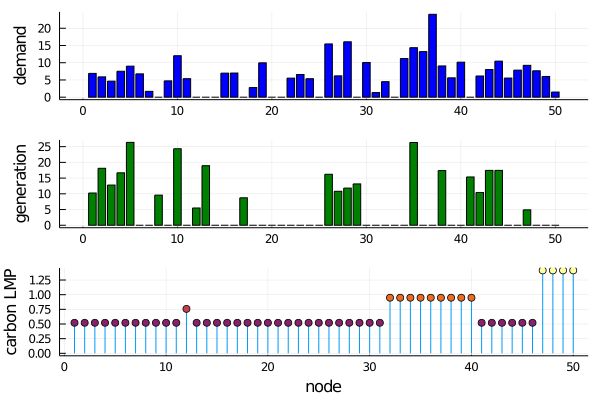

In [225]:
λ = constraints[4].dual[:, 1]  # <-- LMPs

# Fancy colors
gradient = cgrad(:inferno)
lmp_colors = [get(gradient, λi/maximum(λ)) for λi in λ]


plt1 = bar(d, label=nothing, c=:blue, ylabel="demand")
plt2 = bar(evaluate(g), label=nothing, c=:green, ylabel="generation")
plt3 = sticks(λ, label=nothing, ylabel="carbon LMP", xlabel="node")
scatter!(plt3, λ, c=lmp_colors, label=nothing)

plot(plt1, plt2, plt3, layout=(3, 1))

## Plot carbon LMPs

Brighter is more carbon intensive. At the bright nodes (orange and yellow), increasing / decreasing demand has the greatest effect on total emissions.

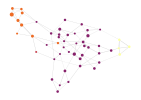

In [226]:
plt = gplot(G, nodesize=nodesize, nodefillc=lmp_colors, edgelinewidth=edgelinewidth)

# Other stuff

In [158]:
# <-- type \lambda and hit tab to get
λ = 1  # <-- this is a generic character, and can be used as a variable, function, etc

# Other neat symbols and things
∇J = 2
μ = mean(Exponential(2.3))
∂f_∂x1 = 27

@show μ
@show 2 ∈ [3, 4]
@show 5 ≈ 5 + eps()
@show 24 // 10
@show [3, 4] ⊆ [3, 4, 2021]

A  # <-- printing SparseArrays displays the sparsity pattern

μ = 2.3
2 ∈ [3, 4] = false
5 ≈ 5 + eps() = true
24 // 10 = 12//5
[3, 4] ⊆ [3, 4, 2021] = true


50×100 SparseArrays.SparseMatrixCSC{Int64, Int64} with 200 stored entries:
⠫⠷⠒⢦⡤⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠁⠀⠈⠑⠨⠗⠢⣤⠤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠡⠩⠉⠗⡤⠤⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⢀⠀⠀⠀⠀⠀⠀⠀⠀⠑⠷⠦⠤⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠄⠀⠀⠄⠂⠀⠈⠀⠀⠀⠀⠁⠩⠱⢤⣀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠄⡀⠀⠂⠀⠀⠀⠀⠀⠄⠀⠀⠀⠐⠀⠂⠈⠑⠘⠶⣢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠂⠀⠀⠀⠀⠀⠀⠀⠠⠀⠈⠀⠀⠀⠀⠠⠀⠀⠀⠀⠀⠈⠳⢶⢄⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠚⢋⠲⣢⢄⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠂⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠀⠀⠀⠙⠶⣢⣀⠀⠀
⠀⡀⠈⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⠁⠀⠀⠀⠀⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠑⠲⣢

In [156]:
?

search:  ] [ = $ ; ( { ) ? . } ⊻ ⊋ ⊊ ⊉ ⊈ ⊇ ⊆ ≥ ≤ ≢ ≡ ≠ ≉ ≈ ∪ ∩ ∛ √ ∘ ∌ ∋ ∉ ∈ ℯ π



**Welcome to Julia 1.6.0.** The full manual is available at

```
https://docs.julialang.org
```

as well as many great tutorials and learning resources:

```
https://julialang.org/learning/
```

For help on a specific function or macro, type `?` followed by its name, e.g. `?cos`, or `?@time`, and press enter. Type `;` to enter shell mode, `]` to enter package mode.


In [129]:
? Gamma  # getting help in Julia

search: Gamma gamutmax InverseGamma GLP_ASN_MIN GLP_ASN_MAX gamutmin GLP_ASN_MMP



```
Gamma(α,θ)
```

The *Gamma distribution* with shape parameter `α` and scale `θ` has probability density function

$$
f(x; \alpha, \theta) = \frac{x^{\alpha-1} e^{-x/\theta}}{\Gamma(\alpha) \theta^\alpha},
\quad x > 0
$$

```julia
Gamma()          # Gamma distribution with unit shape and unit scale, i.e. Gamma(1, 1)
Gamma(α)         # Gamma distribution with shape α and unit scale, i.e. Gamma(α, 1)
Gamma(α, θ)      # Gamma distribution with shape α and scale θ

params(d)        # Get the parameters, i.e. (α, θ)
shape(d)         # Get the shape parameter, i.e. α
scale(d)         # Get the scale parameter, i.e. θ
```

External links

  * [Gamma distribution on Wikipedia](http://en.wikipedia.org/wiki/Gamma_distribution)
